In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [3]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [34]:
titanic_mean=titanic.copy()
means = titanic_mean.Survived.groupby(titanic_mean.Sex).mean()
display(means)
titanic_mean["Sex_enc"] = titanic_mean.Sex.map(means)
titanic_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


In [26]:
enc = LabelEncoder()
titanic_LabelEncoding=titanic.copy()

titanic_LabelEncoding["Sex_enc"] = enc.fit_transform(titanic_LabelEncoding.Sex)
titanic_LabelEncoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [11]:
titanic_onehot=titanic.copy()

In [12]:
pd.get_dummies(titanic_onehot, columns=["Embarked"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [14]:
enc = OneHotEncoder(sparse=False)
titanic_onehot.Embarked = titanic_onehot.Embarked.fillna(titanic_onehot.Embarked.mode()[0])
encoded_features = enc.fit_transform(titanic_onehot[["Embarked"]]).astype(np.uint8)
encoded_features

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [15]:
pd.DataFrame(encoded_features)

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [16]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [18]:
categories = enc.categories_[0].tolist()
categories

['C', 'Q', 'S']

In [19]:
 pd.DataFrame(encoded_features, columns=categories)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

# # # Label cabin

In [35]:
titanic_Cabin_Label=titanic.copy()
titanic_Cabin_Label.Cabin = titanic_Cabin_Label.Embarked.fillna(titanic_Cabin_Label.Cabin.mode()[0])

In [36]:
enc = LabelEncoder()
titanic_Cabin_Label["Cabin"] = enc.fit_transform(titanic_Cabin_Label.Cabin)
titanic_Cabin_Label

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,3,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,3,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,3,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

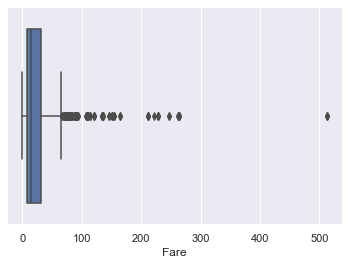

In [5]:
sns.set()

sns.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [7]:
z_score = (titanic.Fare - titanic.Fare.mean() ) / titanic.Fare.std()
z_score

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [8]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [9]:
upper_replace_value = titanic[z_score<=3].Fare.max()
lower_replace_value = titanic[z_score>=-3].Fare.min()

In [10]:
lower_replace_value, upper_replace_value

(0.0, 164.8667)

In [11]:
titanic_replaced = titanic.copy()
titanic_replaced.Fare[z_score>3] = upper_replace_value
titanic_replaced.Fare[z_score<-3] = lower_replace_value

<ipython-input-11-664418159072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_replaced.Fare[z_score>3] = upper_replace_value
<ipython-input-11-664418159072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_replaced.Fare[z_score<-3] = lower_replace_value


In [12]:
titanic.Fare.min(),titanic.Fare.max()

(0.0, 512.3292)

In [13]:
titanic_replaced.Fare.min(),titanic_replaced.Fare.max()

(0.0, 164.8667)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [15]:
q1 = titanic.Fare.quantile(q=0.25)
q3 = titanic.Fare.quantile(q=0.75)
iqr = q3-q1
iqr

23.0896

In [30]:
q1_tita=titanic.Fare<q1
q3_tita=titanic.Fare>q3
q1_tita.sum() , q3_tita.sum()

(223, 222)

In [16]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [17]:
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced.Fare[titanic.Fare > upper_limit] = upper_limit
titanic_iqr_replaced.Fare[titanic.Fare < lower_limit] = lower_limit

<ipython-input-17-1759f1afa8d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_iqr_replaced.Fare[titanic.Fare > upper_limit] = upper_limit
<ipython-input-17-1759f1afa8d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_iqr_replaced.Fare[titanic.Fare < lower_limit] = lower_limit


In [18]:
titanic_iqr_replaced.Fare.min(), titanic_iqr_replaced.Fare.max()

(0.0, 65.6344)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [19]:
lower_limit = titanic.Fare.quantile(q=0.01)
upper_limit = titanic.Fare.quantile(q=0.99)

In [31]:
low_hg_titan=titanic.Fare<lower_limit
up_hg_titan=titanic.Fare>upper_limit
low_hg_titan.sum() , up_hg_titan.sum()

(0, 9)

In [20]:
lower_limit, upper_limit

(0.0, 249.00622000000033)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [22]:
titanic_he_replaced = titanic.copy()
titanic_he_replaced.Fare[titanic.Fare > upper_limit] = upper_limit
titanic_he_replaced.Fare[titanic.Fare < lower_limit] = lower_limit

<ipython-input-22-53eff9ec30be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_he_replaced.Fare[titanic.Fare > upper_limit] = upper_limit
<ipython-input-22-53eff9ec30be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_he_replaced.Fare[titanic.Fare < lower_limit] = lower_limit


In [23]:
titanic_he_replaced.Fare.min(), titanic_he_replaced.Fare.max()

(0.0, 249.00622000000033)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [ ]:
# zscore üst sınır degerlerinde 20 tane bulurken alt sınır degeri bulmadı.
# IQR sınır degerlerinde 223 altsınır degeri bulurken 222 tane üst sınır degeri buldu.
# Hard Edge alt sınır değeri bulmaz iken 9 tane de üst sınır değişkeni buldu.

In [ ]:
#IQR 445 tane veriyi drop ettiginden dolayı elimdeki ver hep ortalama bir veri olacak gelecek testde anlamlı ama üst bir
#değer gördüğünde işlem yapamayacagından kullanışsız olacaktır.

In [ ]:
#Hard Edge 9 tane veriyi drop ediyor bu da kullanılabilir ama üst sınır bence halen çok üstte tuttugundan dolayı 
#bu sefer de anlamsız ve üst bir değer gördüğünde anlamlıymış gibi davranabilir.

In [ ]:
#Bence bu datada hem veri silme konusunda ortalama ve anlam yakalama konusunda 
#daha iyi olacağını düşündüğüm zscore kullanılmasını önerirdim.